In [1]:
#import modules
import pandas as pd
import numpy as np
import re

# Custom preprocessing function
from utils import preprocess_text


# Vectorization methods
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
#read csv that includes stock data
transcribed_list= pd.read_csv('transcribed_transcript_list.csv')
transcribed_list.head(10)
print(transcribed_list['transcript'][0])

Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conference Call October 29, 2020  5:00 PM ET
Company Participants 
Tejas Gala - Senior Manager, Corporate Finance and Investor Relations
Tim Cook - Chief Executive Officer
Luca Maestri - Senior Vice President and Chief Financial Officer
Conference Call Participants
Shannon Cross - Cross Research
Jeriel Ong - Deutsche Bank
Katy Huberty - Morgan Stanley
Amit Daryanani - Evercore
Samik Chatterjee - JP Morgan
Krish Sankar - Cowen and Company
Kyle McNealy - Jefferies
Chris Caso - Raymond James
Operator
Good day everyone and welcome to the Apple Inc. Fourth Quarter Fiscal Year 2020 Earnings Conference Call. Today’s call is being recorded.
At this time for opening remarks and introductions, I would like to turn things over to Tejas Gala, Senior Analyst, Corporate Finance and Investor Relations. Please go ahead, sir.
Tejas Gala
Thank you. Good afternoon and thank you for joining us. Speaking first today is Apple’s CEO, Tim Cook, and he will be followed

In [3]:
#add column that includes the total character count for each earning call transcrip
transcribed_list['char_count']= transcribed_list['transcript'].str.len()
transcribed_list[['transcript', 'char_count']].head()

,transcript,char_count
0,Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conf...,49717
1,Apple Inc. (NASDAQ:AAPL) Q3 2020 Results Confe...,46305
2,Apple Inc. (NASDAQ:AAPL) Q2 2020 Results Confe...,46869
3,Apple Inc. (NASDAQ:AAPL) Q1 2020 Results Confe...,46419
4,AbbVie Inc. (NYSE:ABBV) Q3 2020 Results Earnin...,75442


In [4]:
# reference link-https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
# function to remove punctuation
import re,string
#('[^\w\s]','')
def strip_links(text):
    link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#',""]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [5]:
#apply function above to transcript column
transcribed_list['no_punctuation']=transcribed_list['transcript'].map(lambda x:strip_all_entities(strip_links(x)))

print(transcribed_list['no_punctuation'][0:6])

0    Apple Inc NASDAQ AAPL Q4 2020 Earnings Confere...
1    Apple Inc NASDAQ AAPL Q3 2020 Results Conferen...
2    Apple Inc NASDAQ AAPL Q2 2020 Results Conferen...
3    Apple Inc NASDAQ AAPL Q1 2020 Results Conferen...
4    AbbVie Inc NYSE ABBV Q3 2020 Results Earnings ...
5    AbbVie Inc NYSE ABBV Q2 2020 Earnings Conferen...
Name: no_punctuation, dtype: object


In [6]:
#remove quotes and apostrophes
transcribed_list['no_punctuation']=transcribed_list['no_punctuation'].str.replace('[^\w\s]','')
print(transcribed_list['no_punctuation'][0:6])

0    Apple Inc NASDAQ AAPL Q4 2020 Earnings Confere...
1    Apple Inc NASDAQ AAPL Q3 2020 Results Conferen...
2    Apple Inc NASDAQ AAPL Q2 2020 Results Conferen...
3    Apple Inc NASDAQ AAPL Q1 2020 Results Conferen...
4    AbbVie Inc NYSE ABBV Q3 2020 Results Earnings ...
5    AbbVie Inc NYSE ABBV Q2 2020 Earnings Conferen...
Name: no_punctuation, dtype: object


In [7]:
#preprocess latest transcriped list with preprocess function in utils.py file

transcribed_list['preprocess_trans']= transcribed_list['no_punctuation'].apply(lambda x : ' '.join(preprocess_text(x, min_word_length=4)))
print(transcribed_list['preprocess_trans'][0:6])

0    apple nasdaq aapl earn conference call october...
1    apple nasdaq aapl result conference call july ...
2    apple nasdaq aapl result conference call april...
3    apple nasdaq aapl result conference call janua...
4    abbvie nyse abbv result earn conference call o...
5    abbvie nyse abbv earn conference call july com...
Name: preprocess_trans, dtype: object


In [8]:
# removal words used infrequently @10% of the amount of transcripts

in_freq_words = pd.Series(' '.join(transcribed_list['preprocess_trans']).split()).value_counts()[-400:]
in_freq_words.head()

grandfather     1
cmmi            1
skookumchuck    1
hypermarket     1
thereabout      1
dtype: int64

In [9]:
# list frequent words @10% of the amount of transcripts

freq_words = pd.Series(' '.join(transcribed_list['preprocess_trans']).split()).value_counts()[400:]
freq_words.head()

date           914
information    913
hard           910
deposit        905
type           903
dtype: int64

In [10]:
# Removing the infrequent words from the  transcript file
in_freq_words = list(in_freq_words.index)
transcribed_list['clean_trans'] = transcribed_list['preprocess_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in in_freq_words))
transcribed_list['clean_trans'].head()

0    apple nasdaq aapl earn conference call october...
1    apple nasdaq aapl result conference call july ...
2    apple nasdaq aapl result conference call april...
3    apple nasdaq aapl result conference call janua...
4    abbvie nyse abbv result earn conference call o...
Name: clean_trans, dtype: object

In [11]:
#list to include most common words
all_words = []
for line in list(transcribed_list['clean_trans']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
print(all_words[10])

featured_words = list(all_words)[:1000]
print(featured_words)

gala
['apple', 'nasdaq', 'aapl', 'earn', 'conference', 'call', 'october', 'company', 'participant', 'tejas', 'gala', 'senior', 'manager', 'corporate', 'finance', 'investor', 'relation', 'cook', 'chief', 'executive', 'officer', 'luca', 'maestro', 'senior', 'vice', 'president', 'chief', 'financial', 'officer', 'conference', 'call', 'participant', 'shannon', 'cross', 'cross', 'research', 'jeriel', 'deutsche', 'bank', 'katy', 'huberty', 'morgan', 'stanley', 'amit', 'daryanani', 'evercore', 'samik', 'chatterjee', 'morgan', 'krish', 'sankar', 'cowen', 'company', 'kyle', 'mcnealy', 'jefferies', 'chris', 'caso', 'raymond', 'operator', 'good', 'everyone', 'welcome', 'apple', 'fourth', 'quarter', 'fiscal', 'year', 'earn', 'conference', 'call', 'today', 'call', 'record', 'time', 'open', 'remark', 'introduction', 'turn', 'tejas', 'gala', 'senior', 'analyst', 'corporate', 'finance', 'investor', 'relation', 'please', 'ahead', 'tejas', 'gala', 'thank', 'good', 'afternoon', 'thank', 'join', 'speak', '

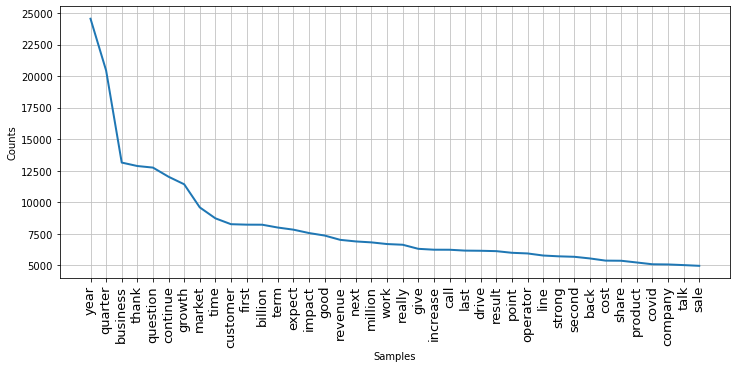

<Figure size 432x288 with 0 Axes>

In [12]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
#display top word frequency of the top 40 words
fd.plot(40,cumulative=False)

# Exports graph as a png image file
plt.savefig("Fig1Top40Words.png")

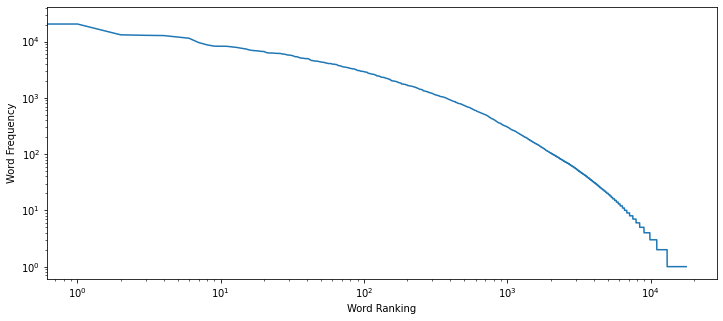

In [13]:
# log-log of all words
from collections import Counter
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Word Frequency")
plt.xlabel("Word Ranking")

# Exports graph as a png image file
plt.savefig("Fig2WordFreqandRank.png")

In [14]:
#verify latest dataframe column output
transcribed_list.head()

,Unnamed: 0,date,ticker,title,transcript,url,char_count,no_punctuation,preprocess_trans,clean_trans
0,0,2020-10-29,AAPL,Apple Inc. (AAPL) CEO Tim Cook on Q4 2020 Resu...,Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conf...,/article/4382943-apple-inc-aapl-ceo-tim-cook-o...,49717,Apple Inc NASDAQ AAPL Q4 2020 Earnings Confere...,apple nasdaq aapl earn conference call october...,apple nasdaq aapl earn conference call october...
1,1,2020-07-30,AAPL,Apple Inc. (AAPL) CEO Tim Cook on Q3 2020 Resu...,Apple Inc. (NASDAQ:AAPL) Q3 2020 Results Confe...,/article/4362707-apple-inc-aapl-ceo-tim-cook-o...,46305,Apple Inc NASDAQ AAPL Q3 2020 Results Conferen...,apple nasdaq aapl result conference call july ...,apple nasdaq aapl result conference call july ...
2,2,2020-04-30,AAPL,Apple Inc. (AAPL) CEO Tim Cook on Q2 2020 Resu...,Apple Inc. (NASDAQ:AAPL) Q2 2020 Results Confe...,/article/4341792-apple-inc-aapl-ceo-tim-cook-o...,46869,Apple Inc NASDAQ AAPL Q2 2020 Results Conferen...,apple nasdaq aapl result conference call april...,apple nasdaq aapl result conference call april...
3,3,2020-01-28,AAPL,Apple Inc. (AAPL) CEO Tim Cook on Q1 2020 Resu...,Apple Inc. (NASDAQ:AAPL) Q1 2020 Results Confe...,/article/4319666-apple-inc-aapl-ceo-tim-cook-o...,46419,Apple Inc NASDAQ AAPL Q1 2020 Results Conferen...,apple nasdaq aapl result conference call janua...,apple nasdaq aapl result conference call janua...
4,8,2020-10-30,ABBV,AbbVie Inc.'s (ABBV) CEO Rick Gonzalez on Q3 2...,AbbVie Inc. (NYSE:ABBV) Q3 2020 Results Earnin...,/article/4383381-abbvie-inc-s-abbv-ceo-rick-go...,75442,AbbVie Inc NYSE ABBV Q3 2020 Results Earnings ...,abbvie nyse abbv result earn conference call o...,abbvie nyse abbv result earn conference call o...


In [15]:
#remove stop words
from sklearn.feature_extraction import text #import package

skl_stopwords = text.ENGLISH_STOP_WORDS
#print(skl_stopwords)

from nltk.corpus import stopwords # for excluding the stopwords

#creating an object using the default nltk stopwords
nltk_stopwords = stopwords.words("english")
print(nltk_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
#remove stop words from latest cleaned transcript
transcribed_list['clean_trans2']=transcribed_list['clean_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in nltk_stopwords))
transcribed_list['clean_trans2'][:6]

0    apple nasdaq aapl earn conference call october...
1    apple nasdaq aapl result conference call july ...
2    apple nasdaq aapl result conference call april...
3    apple nasdaq aapl result conference call janua...
4    abbvie nyse abbv result earn conference call o...
5    abbvie nyse abbv earn conference call july com...
Name: clean_trans2, dtype: object

In [25]:
documents= transcribed_list['clean_trans2'].values

In [ ]:
from sklearn.model_selection import train_test_split
#add lists of labels pos, neg, neutral
#textblob library vader pre trained for sentiment scoring



In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Now eliminaing customized stop words
count_vect = CountVectorizer(binary=False, stop_words = nltk_stopwords) 

count_vect_custom_stopwords = count_vect.fit_transform(transcribed_list['clean_trans2'])
print(count_vect_custom_stopwords.shape)
print(count_vect_custom_stopwords)

names = count_vect.get_feature_names()   
count = np.sum(count_vect_custom_stopwords.toarray(), axis = 0) 
count2 = count.tolist() 

#dataframe of output
count_df = pd.DataFrame(count2, index = names, columns = ['Word Count']) 
#  top 20 features by count
count_df.sort_values(['Word Count'], ascending = False)[:20]



(401, 17688)
  (0, 957)	53
  (0, 10327)	1
  (0, 123)	1
  (0, 4886)	4
  (0, 3244)	4
  (0, 2295)	15
  (0, 10827)	3
  (0, 3120)	14
  (0, 11368)	2
  (0, 15675)	7
  (0, 6346)	5
  (0, 14179)	3
  (0, 9310)	1
  (0, 3501)	2
  (0, 5889)	2
  (0, 8098)	5
  (0, 13142)	3
  (0, 3453)	3
  (0, 2723)	2
  (0, 5523)	1
  (0, 10848)	2
  (0, 9154)	13
  (0, 9238)	3
  (0, 16993)	1
  (0, 12188)	1
  :	:
  (400, 1559)	3
  (400, 2640)	3
  (400, 3592)	1
  (400, 4567)	2
  (400, 8413)	1
  (400, 2338)	1
  (400, 10128)	2
  (400, 11323)	6
  (400, 10770)	2
  (400, 7047)	1
  (400, 9287)	2
  (400, 16366)	2
  (400, 13368)	1
  (400, 6266)	1
  (400, 1263)	1
  (400, 8431)	1
  (400, 3797)	1
  (400, 9959)	1
  (400, 2989)	1
  (400, 16540)	1
  (400, 12789)	1
  (400, 6823)	1
  (400, 8697)	1
  (400, 5584)	1
  (400, 5850)	1


,Word Count
year,24545
quarter,20441
business,13147
thank,12874
question,12749
continue,12024
growth,11428
market,9596
time,8729
customer,8264


In [22]:
train_set, test_set = featured_words[100:], featured_words[:100]
test_set

['apple',
 'nasdaq',
 'aapl',
 'earn',
 'conference',
 'call',
 'october',
 'company',
 'participant',
 'tejas',
 'gala',
 'senior',
 'manager',
 'corporate',
 'finance',
 'investor',
 'relation',
 'cook',
 'chief',
 'executive',
 'officer',
 'luca',
 'maestro',
 'senior',
 'vice',
 'president',
 'chief',
 'financial',
 'officer',
 'conference',
 'call',
 'participant',
 'shannon',
 'cross',
 'cross',
 'research',
 'jeriel',
 'deutsche',
 'bank',
 'katy',
 'huberty',
 'morgan',
 'stanley',
 'amit',
 'daryanani',
 'evercore',
 'samik',
 'chatterjee',
 'morgan',
 'krish',
 'sankar',
 'cowen',
 'company',
 'kyle',
 'mcnealy',
 'jefferies',
 'chris',
 'caso',
 'raymond',
 'operator',
 'good',
 'everyone',
 'welcome',
 'apple',
 'fourth',
 'quarter',
 'fiscal',
 'year',
 'earn',
 'conference',
 'call',
 'today',
 'call',
 'record',
 'time',
 'open',
 'remark',
 'introduction',
 'turn',
 'tejas',
 'gala',
 'senior',
 'analyst',
 'corporate',
 'finance',
 'investor',
 'relation',
 'please',
 

In [23]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

ValueError: too many values to unpack (expected 2)

In [19]:
#attempt Naive Bayes Classifier to predict sentiments

featured_words = list(all_words)[:1000]
print(featured_words)

def document_features(document):
    document_words = set(document)
    features = {}
    for word in featured_words:
        features['contains({})'.format(word)] = (word in document_words)
    return features


#featuresets = [(document_features(d), c) for (d,c) in transcribed_list['clean_trans2']]
#train_set, test_set = featuresets[200:], featuresets[:200]
train_set, test_set = featured_words[100:], featured_words[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

['apple', 'nasdaq', 'aapl', 'earn', 'conference', 'call', 'october', 'company', 'participant', 'tejas', 'gala', 'senior', 'manager', 'corporate', 'finance', 'investor', 'relation', 'cook', 'chief', 'executive', 'officer', 'luca', 'maestro', 'senior', 'vice', 'president', 'chief', 'financial', 'officer', 'conference', 'call', 'participant', 'shannon', 'cross', 'cross', 'research', 'jeriel', 'deutsche', 'bank', 'katy', 'huberty', 'morgan', 'stanley', 'amit', 'daryanani', 'evercore', 'samik', 'chatterjee', 'morgan', 'krish', 'sankar', 'cowen', 'company', 'kyle', 'mcnealy', 'jefferies', 'chris', 'caso', 'raymond', 'operator', 'good', 'everyone', 'welcome', 'apple', 'fourth', 'quarter', 'fiscal', 'year', 'earn', 'conference', 'call', 'today', 'call', 'record', 'time', 'open', 'remark', 'introduction', 'turn', 'tejas', 'gala', 'senior', 'analyst', 'corporate', 'finance', 'investor', 'relation', 'please', 'ahead', 'tejas', 'gala', 'thank', 'good', 'afternoon', 'thank', 'join', 'speak', 'first

ValueError: too many values to unpack (expected 2)

In [ ]:
featuresets = transcribed_list['clean_trans2']
train_set, test_set = featuresets[200:], featuresets[:200]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
classifier.show_most_informative_features(5)